In [ ]:
Задание №1. Исследование набора данных

Был выбран датасет "Walmart Trends"

Он содержит данные о сумме, на которую производились покупки в 45 магазинах Walmart, с 05.02.2010 по 26.10.2012,
а также некоторые внешние факторы, такие как праздники, температура, цена за топливо, индекс потребительских цен и уровень безработицы.
Предназначен для выявления закономерностей между суммой покупок и остальными данными.

Предметная область: сумма покупок в магазинах Walmart
Источник данных: сайт kaggle
https://www.kaggle.com/datasets/eshummalik/walmart-trends/data
Характер данных: реальные данные с еженедельным заполнением
Задача анализа: понять закономерности продаж, выделить факторы, влияющие на производительность, 
и предоставить аналитические сведения, которые могут помочь в более эффективном прогнозировании и принятии решений
Атрибуты:
Store -            id магазина Walmart                             (числовой формат данных)
Date -             дата                                            (строковый формат данных)
Weekly_Sales -     сумма, на которую продали товаров за неделю     (числовой формат данных)
Holiday_Flag -     признак праздников                              (числовой формат данных)
Temperature -      средняя температура в Фаренгейтах на улице      (числовой формат данных)
Fuel_Price -       цена за галлон топлива                          (числовой формат данных)
CPI -              индекс потребительских цен                      (числовой формат данных)
Unemployment -     уровень безработицы                             (числовой формат данных)


In [124]:
# Инициализация

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np

pd.set_option("display.max_columns", 10)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", "{:.5f}".format)

columns = ["Store", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

df = pd.read_csv("Walmart_Sales.csv")

In [90]:
# Среднее значение по столбцам

df.mean(numeric_only=True)

Store               23.00000
Weekly_Sales   1046964.87756
Holiday_Flag         0.06993
Temperature         60.66378
Fuel_Price           3.35861
CPI                171.57839
Unemployment         7.99915
dtype: float64

In [91]:
# СКО по столбцам

df.std(numeric_only=True)

Store              12.98818
Weekly_Sales   564366.62205
Holiday_Flag        0.25505
Temperature        18.44493
Fuel_Price          0.45902
CPI                39.35671
Unemployment        1.87588
dtype: float64

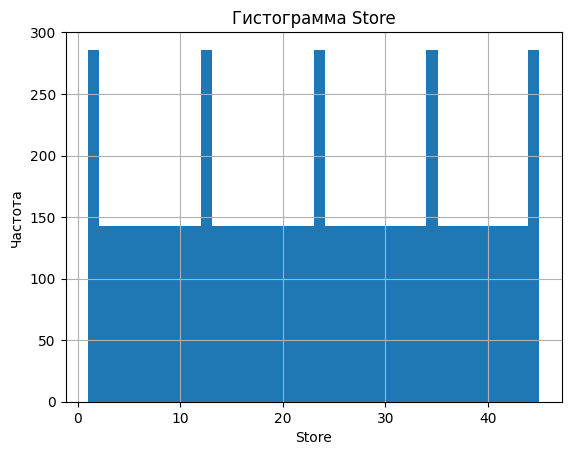

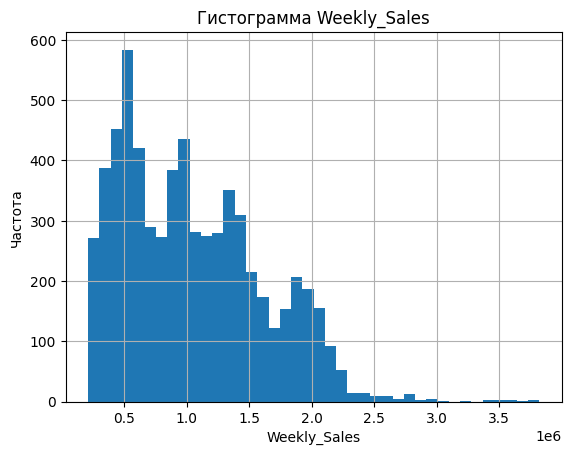

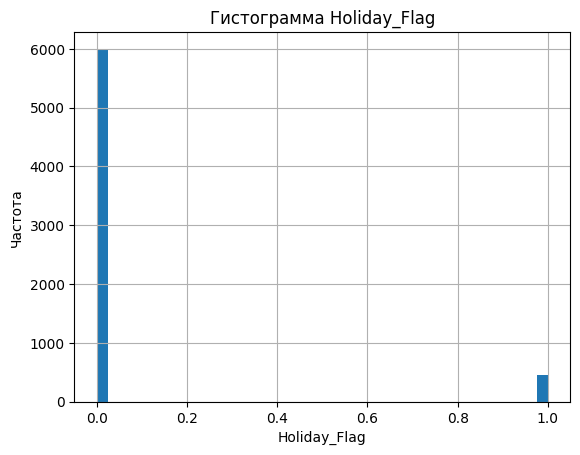

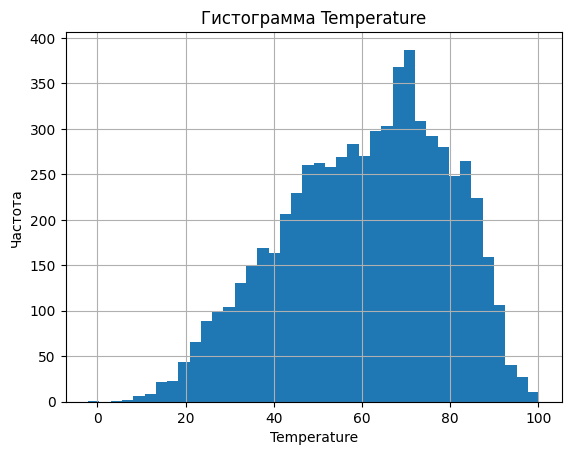

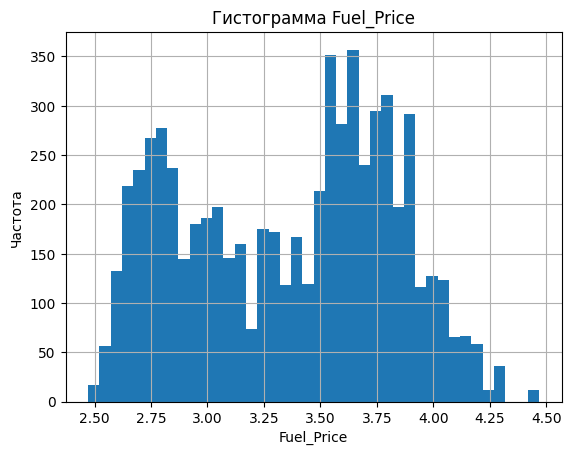

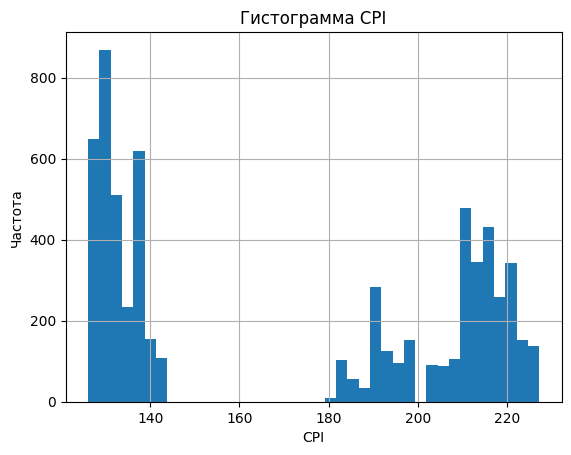

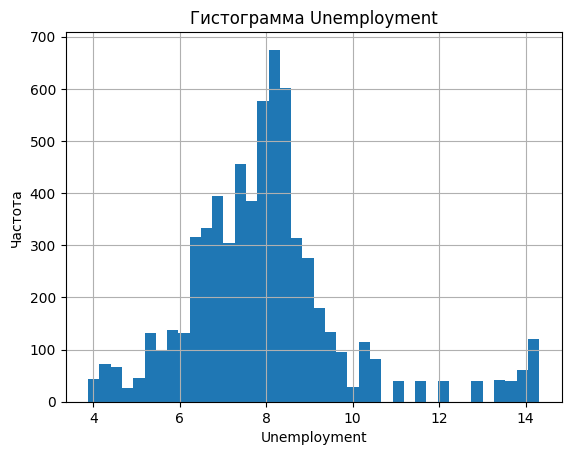

In [73]:
# Гистограммы распределения значений

for column in columns:
    plt.figure()
    df[column].hist(bins=40)
    plt.title("Гистограмма " + column)
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.show()

In [81]:
# Количество выбросов для каждой колонки

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    outlier = df[(df[column] < lbound) | (df[column] > ubound)]
    
    print(column + ":", end="\t")
    if outlier.empty:
        print("Нет выбросов")
    else:
        print(len(outlier), "выброс(а/ов)")

Store:	Нет выбросов
Weekly_Sales:	34 выброс(а/ов)
Holiday_Flag:	450 выброс(а/ов)
Temperature:	3 выброс(а/ов)
Fuel_Price:	Нет выбросов
CPI:	Нет выбросов
Unemployment:	481 выброс(а/ов)


In [82]:
# Количество пропущенных значений

for column in columns:
    print(column + ":", df[column].isnull().sum())

Store: 0
Weekly_Sales: 0
Holiday_Flag: 0
Temperature: 0
Fuel_Price: 0
CPI: 0
Unemployment: 0


In [ ]:
Пропущенных значений нет, значит их не требуется обрабатывать

In [93]:
# Корреляция между параметрами

corr = df.corr(numeric_only=True)
display(corr)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.00000,-0.33533,-0.00000,-0.02266,0.06002,-0.20949,0.22353
Weekly_Sales,-0.33533,1.00000,0.03689,-0.06381,0.00946,-0.07263,-0.10618
Holiday_Flag,-0.00000,0.03689,1.00000,-0.15509,-0.07835,-0.00216,0.01096
Temperature,-0.02266,-0.06381,-0.15509,1.00000,0.14498,0.17689,0.10116
Fuel_Price,0.06002,0.00946,-0.07835,0.14498,1.00000,-0.17064,-0.03468
CPI,-0.20949,-0.07263,-0.00216,0.17689,-0.17064,1.00000,-0.30202
Unemployment,0.22353,-0.10618,0.01096,0.10116,-0.03468,-0.30202,1.00000


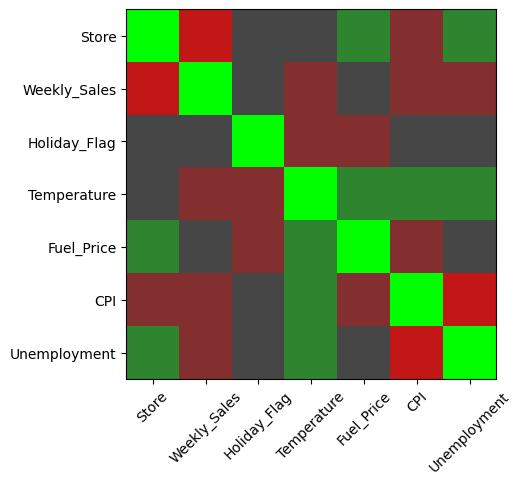

In [137]:
# Корреляция в виде цветовой схемы,
# где отрицательные значения в красном градиенте,
# а положительные значения - в зеленом

def colormap(x):
    if x >= 0.7:
        return [0, 1, 0]
    elif x >= 0.3:
        return [23 / 255, 193 / 255, 23 / 255]
    elif x >= 0.05:
        return [47 / 255, 132 / 255, 47 / 255]
    elif x > -0.05 and x < 0.05:
        return [70 / 255, 70 / 255, 70 / 255]
    elif x > -0.3:
        return [132 / 255, 47 / 255, 47 / 255]
    elif x > -0.7:
        return [193 / 255, 23 / 255, 23 / 255]
    else:
        return [1, 0, 0]

color = corr.map(colormap).to_numpy()
color = np.array([[to_rgb(col) for col in row] for row in color])

plt.imshow(color)
plt.xticks(ticks=range(len(corr)), labels=corr, rotation=45)
plt.yticks(ticks=range(len(corr)), labels=corr)
plt.show()


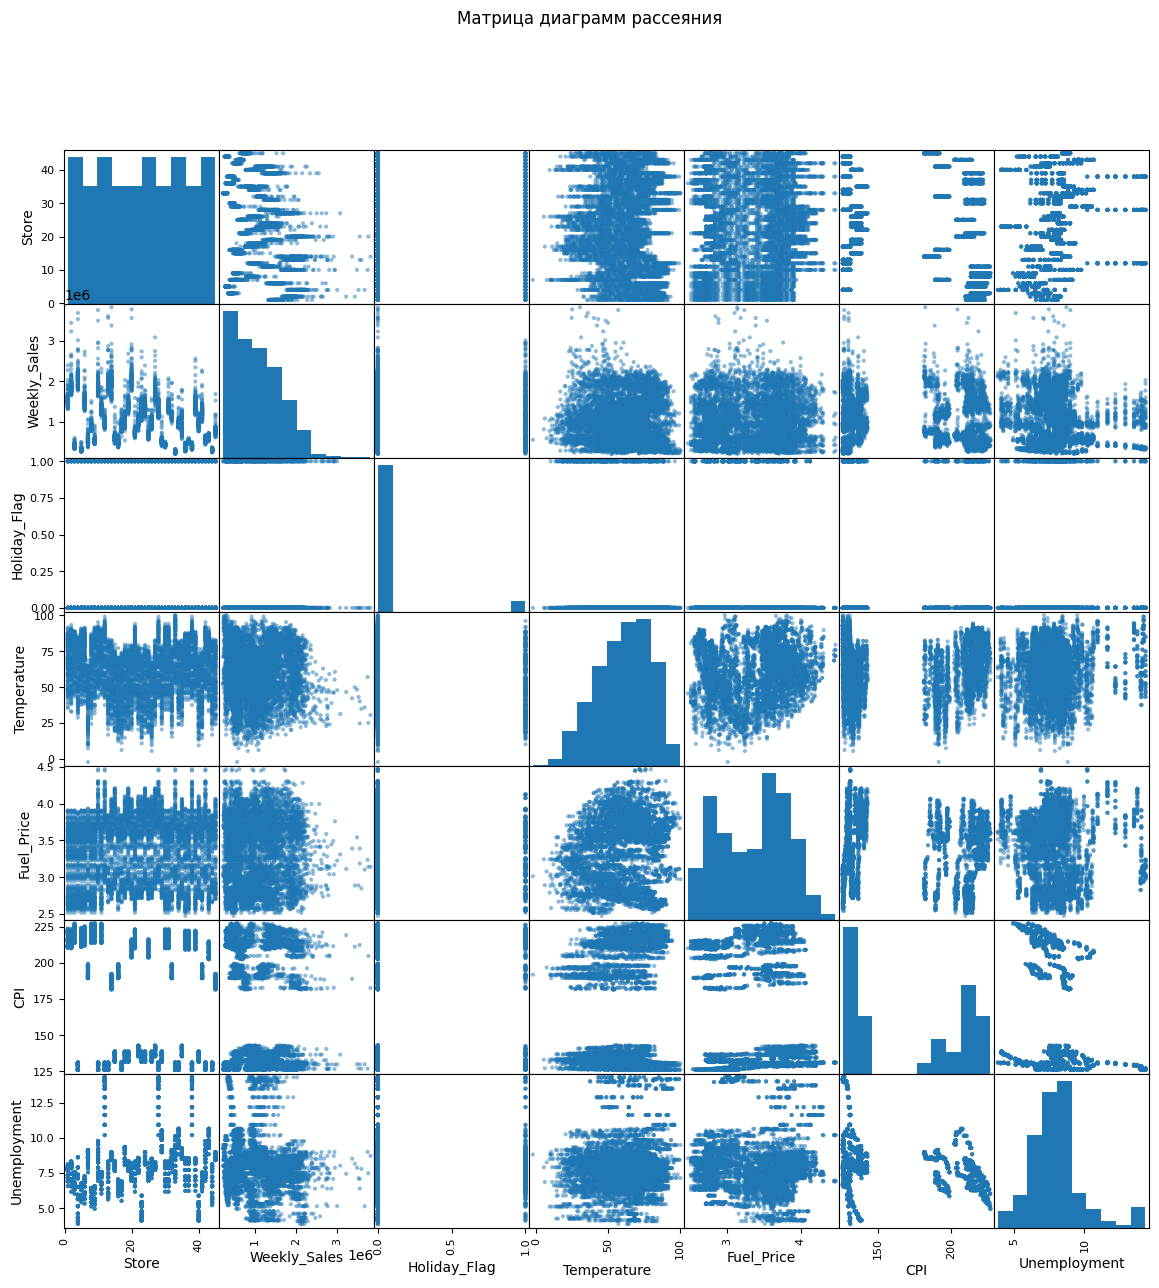

In [144]:
# Матрица диаграмм рассеивания

pd.plotting.scatter_matrix(df[columns], figsize=(14,14))
plt.suptitle("Матрица диаграмм рассеяния")
plt.show()

In [ ]:
Вывод

Как можно заметить, сумма покупок в магазинах Walmart слабо коррелирует с внешними факторами, такими как:
праздники, температура, цена за топливо, индекс потребительских цен и уровень безработицы.
Но, хоть значения корреляции и не высоки, они показывают что в праздники люди немного больше покупают,
а в холодную погоду, при высоком CPI или уровне безработицы наоборот - немного меньше.

Видна отрицательная зависимость между CPI и уровнем безработциы, что соответствует экономической
теории (рост CPI часто связан со снижением безработицы).

Также можно заметить отрицательную корреляцию между id магазина и суммой проданных товаров, что, вероятно, 
связано с тем, что первые магазины являются большим, а, следовательно, в них покупают больше